# RDataFrame advanced features
There are many more features available with the RDataFrame that might serve your analysis needs!

## Working with `numpy` arrays
- RDataFrame offers interoperability with `numpy` arrays. 

- It can be created from a dictionary of such arrays and it can also export its contents to the same format. 

- All operations are available also when using the `numpy`-based dataset.

- **Note:** this support is limited to one-dimensional numpy arrays, which are directly mapped to columns in the RDataFrame.

In [1]:
# Activity: Explain this code cell to your neighbor!

import numpy
import ROOT

np_dict = {colname: numpy.random.rand(100) for colname in ["a","b","c"]}

df = ROOT.RDF.FromNumpy(np_dict)

print(f"Columns in the RDataFrame: {df.GetColumnNames()}")

Columns in the RDataFrame: { "a", "b", "c" }


Number of rows in the dataset: 100
Average value of column a: 0.537301534274929


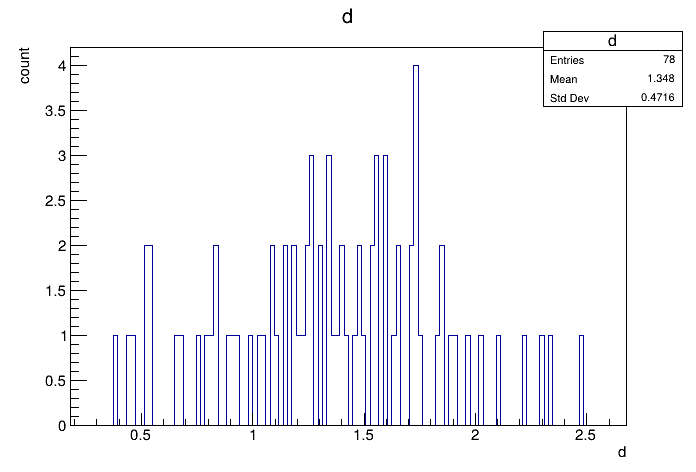

In [2]:
# Activity: Discuss with your neightbor - what does the histogram h contain? (or what is this code cell doing?)

co = df.Count()
m_a = df.Mean("a")

fil1 = df.Filter("c < 0.7")
def1 = fil1.Define("d", "a+b+c")
h = def1.Histo1D("d")

c = ROOT.TCanvas()
h.Draw()

print(f"Number of rows in the dataset: {co.GetValue()}")
print(f"Average value of column a: {m_a.GetValue()}")
c.Draw()

In [23]:
# Try it!
# To-do: Get the mean value of column "d"


# What can be a quick cross check for the answer?

0.43957785566580226

In [3]:
# Export the modified dataframe to a dictionary of numpy arrays

np_dict_mod = def1.AsNumpy()

np_dict_mod

{'a': ndarray([0.95239968, 0.22787905, 0.70898441, 0.94218834, 0.3089811 ,
          0.22331554, 0.67239268, 0.61717269, 0.81405977, 0.03049662,
          0.93728311, 0.787909  , 0.73005027, 0.76992362, 0.79437547,
          0.35003612, 0.10771996, 0.49218744, 0.92117757, 0.26522312,
          0.48405227, 0.67260592, 0.5628399 , 0.83446178, 0.52397714,
          0.22397634, 0.37951575, 0.38499487, 0.18769715, 0.62103583,
          0.11450612, 0.5978601 , 0.92913935, 0.31715294, 0.5123    ,
          0.67434271, 0.45551955, 0.55611943, 0.86481253, 0.55270039,
          0.69491164, 0.53925078, 0.17656599, 0.61478397, 0.15887286,
          0.29843945, 0.17712427, 0.04034196, 0.26085496, 0.32882898,
          0.62601904, 0.99221993, 0.49369593, 0.89682116, 0.79451402,
          0.62416293, 0.08055149, 0.33622529, 0.89780317, 0.63403587,
          0.02631282, 0.5633849 , 0.43181212, 0.86130751, 0.85975031,
          0.94327297, 0.70138498, 0.91939832, 0.54294726, 0.54116265,
          0.702

In [4]:
# Try it!
# To-do: Turn the dataframe to a dicitonary of numpy arrays with only "a" and "b" columns
def1.AsNumpy(["a","b"])

{'a': ndarray([0.95239968, 0.22787905, 0.70898441, 0.94218834, 0.3089811 ,
          0.22331554, 0.67239268, 0.61717269, 0.81405977, 0.03049662,
          0.93728311, 0.787909  , 0.73005027, 0.76992362, 0.79437547,
          0.35003612, 0.10771996, 0.49218744, 0.92117757, 0.26522312,
          0.48405227, 0.67260592, 0.5628399 , 0.83446178, 0.52397714,
          0.22397634, 0.37951575, 0.38499487, 0.18769715, 0.62103583,
          0.11450612, 0.5978601 , 0.92913935, 0.31715294, 0.5123    ,
          0.67434271, 0.45551955, 0.55611943, 0.86481253, 0.55270039,
          0.69491164, 0.53925078, 0.17656599, 0.61478397, 0.15887286,
          0.29843945, 0.17712427, 0.04034196, 0.26085496, 0.32882898,
          0.62601904, 0.99221993, 0.49369593, 0.89682116, 0.79451402,
          0.62416293, 0.08055149, 0.33622529, 0.89780317, 0.63403587,
          0.02631282, 0.5633849 , 0.43181212, 0.86130751, 0.85975031,
          0.94327297, 0.70138498, 0.91939832, 0.54294726, 0.54116265,
          0.702

## Multiple concurrent RDataFrame runs
If your analysis needs multiple RDataFrames to run (for example multiple dataset samples, data vs simulation etc.), make use of `ROOT.RDF.RunGraphs` 

In [5]:
ROOT.EnableImplicitMT()
treename1 = "myDataset"
filename1 = "data/collections_dataset.root"
treename2 = "dataset"
filename2 = "data/example_file.root"

df1 = ROOT.RDataFrame(treename1, filename1)
df2 = ROOT.RDataFrame(treename2, filename2)
h1 = df1.Histo1D("px")
h2 = df2.Histo1D("a")
 

ROOT.RDF.RunGraphs((h1, h2))
ROOT.DisableImplicitMT()

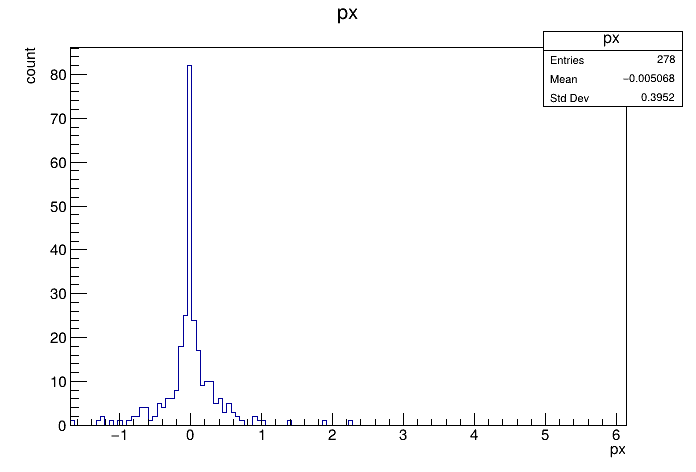

In [7]:
c = ROOT.TCanvas()
h1.Draw()
c.Draw()

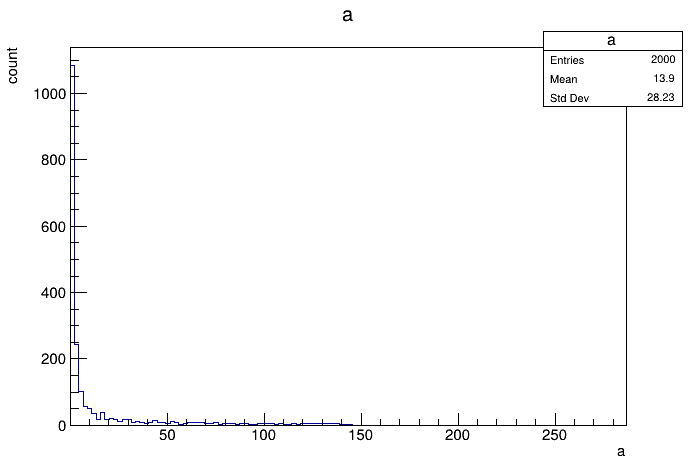

In [6]:
c = ROOT.TCanvas()
h2.Draw()
c.Draw()

# Re-defining values of a column

Sometimes you might want to keep a column with the same name, but modify its values. This is available via the `Redefine` method.

In [8]:
# Activity: Before running the cell, discuss with your neighbor what the output will be (what is in df)
df = ROOT.RDataFrame(5).Define("x", "42")
df.Display().Print()

+-----+----+
| Row | x  | 
+-----+----+
| 0   | 42 | 
+-----+----+
| 1   | 42 | 
+-----+----+
| 2   | 42 | 
+-----+----+
| 3   | 42 | 
+-----+----+
| 4   | 42 | 
+-----+----+


In [11]:
# Activity: Before running the cell, discuss with your neighbor what the output will be (what is in df)
df = df.Redefine("x", "x * 10")
df.Display().Print()

+-----+------+
| Row | x    | 
+-----+------+
| 0   | 4200 | 
+-----+------+
| 1   | 4200 | 
+-----+------+
| 2   | 4200 | 
+-----+------+
| 3   | 4200 | 
+-----+------+
| 4   | 4200 | 
+-----+------+


In [12]:
# Try it!
# To-do: Redifine the x column again with x * 100
df1 = df.Redefine("x", "x * 100")
df1.Display().Print()

df1.Display().Print()

+-----+--------+
| Row | x      | 
+-----+--------+
| 0   | 420000 | 
+-----+--------+
| 1   | 420000 | 
+-----+--------+
| 2   | 420000 | 
+-----+--------+
| 3   | 420000 | 
+-----+--------+
| 4   | 420000 | 
+-----+--------+
+-----+--------+
| Row | x      | 
+-----+--------+
| 0   | 420000 | 
+-----+--------+
| 1   | 420000 | 
+-----+--------+
| 2   | 420000 | 
+-----+--------+
| 3   | 420000 | 
+-----+--------+
| 4   | 420000 | 
+-----+--------+


Notice how we could use the previous values of the `"x"` column to define the new values.

# Distributed RDataFrame

An `RDataFrame` analysis written in Python can be executed both *locally* - possibly in parallel on the cores of the machine - and *distributedly* by offloading computations to external resources, which include:

- [Spark](https://spark.apache.org/) and 
- [Dask](https://dask.org/) clusters. 

- This feature is enabled by the architecture depicted below.

- It shows that RDataFrame computation graphs can be mapped to different kinds of resources via backends.

- In this notebook we will exercise the Dask backend, which divides an `RDataFrame` input dataset in logical ranges and submits computations for each of those ranges to Dask resources.

<img src="images/DistRDF_architecture.png" alt="Distributed RDataFrame">

## Create a Dask client

- In order to work with a Dask cluster we need a `Client` object.
- It represents the connection to that cluster and allows to configure execution-related parameters (e.g. number of cores, memory). 
- The client object is just the intermediary between our client session and the cluster resources, 
- Dask supports many different resource managers.
- We will follow the [Dask documentation](https://distributed.dask.org/en/stable/client.html) regarding the creation of a `Client`.

In [11]:
from dask.distributed import Client, LocalCluster
cluster = LocalCluster(n_workers=2, threads_per_worker=1, processes=True, memory_limit="2GiB")
client = Client(cluster)

## Create a ROOT dataframe

We now create an RDataFrame based on the same dataset seen in the exercise [rdataframe-dimuon](exercises/rdataframe-dimuon.ipynb).

A Dask `RDataFrame` receives two extra parameters: 
- the number of partitions to apply to the dataset (`npartitions`)
- the `Client` object (`daskclient`). 

Besides this detail, a Dask `RDataFrame` is not different from a local `RDataFrame`: the analysis presented in this notebook would not change if we wanted to execute it locally.

In [12]:
# Use a Dask RDataFrame
RDataFrame = ROOT.RDF.Experimental.Distributed.Dask.RDataFrame

df = RDataFrame("h42",
                "https://root.cern/files/h1big.root",
                npartitions=4,
                daskclient=client)

## Run your analysis unchanged

- From now on, the rest of your application can be written **exactly** as we have seen with local RDataFrame. 

- The goal of the distributed RDataFrame module is to support all the traditional RDataFrame operations (those that make sense in a distributed context at least). 

- Currently only a subset of those is available and can be found in the corresponding [section of the documentation](https://root.cern/doc/master/classROOT_1_1RDataFrame.html#distrdf)

In [13]:
%%time
df1 = df.Filter("nevent > 1")
df2 = df1.Define("mpt","sqrt(xpt*xpt + ypt*ypt)")
c = df.Count()
m = df2.Mean("mpt")
print(f"Number of events after processing: {c.GetValue()}")
print(f"Mean of column 'mpt': {m.GetValue()}")

Number of events after processing: 283813
Mean of column 'mpt': 0.13190819625023323
CPU times: user 474 ms, sys: 65.7 ms, total: 540 ms
Wall time: 12.7 s
